# Computation of expected signal for a centered Gaussian Beam

The expected signal for a centered Gaussian beam with standard deviation $\sigma$ 
whose intensity is 
$$\color{blue}{ I(x,y) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}} $$
depends upon the detector radius ($R$), and the width of the gap ($\delta$) 
between the quadrants. Because of the gap between the quadrants, some of the light
intensity is lost and thus the net signal obtained will decrease as the gap size increases.
This notebook computes a function that gives us the total expected signal; the theoretical value is

$$\color{blue}{\mathrm{TotalSignal} = 4\int_0^R dx\int_0^{\sqrt{R^2 -x^2}}dy\;\frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} - 8\int_{\delta}^R dx\int_{\delta}^{\sqrt{R^2 -x^2}}dy\;\frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} -4\int_0^{\delta} dx\int_0^{\delta} dy\;\frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} }$$

This notebook numerically evaluates this TotalSignal function and makes some plots and computes values so that we can test our computational model. 

In [5]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

from matplotlib import rc
rc('text', usetex=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
rcParams['figure.figsize'] = 12, 8


import quadrantdetector.detector as qd
import quadrantdetector.sample_functions as qsf



In [2]:

def DeltaSignalSlice(start, stop, N, sigma, R):
    deltaSignal = np.array([])
    val = np.linspace(start,stop,N)
    for i in val:
        deltaSignal = np.append(deltaSignal, qd.total_signal(i, sigma, R))
   
    return val, deltaSignal
  
def SigmaSignalSlice(start, stop, N, delta, R):
    sigmaSignal = np.array([])
    sigma = np.linspace(start,stop,N)
    for i in sigma:
        sigmaSignal = np.append(sigmaSignal,qd.total_signal(delta, i, R))
        
    return sigma, sigmaSignal
  


(100,)


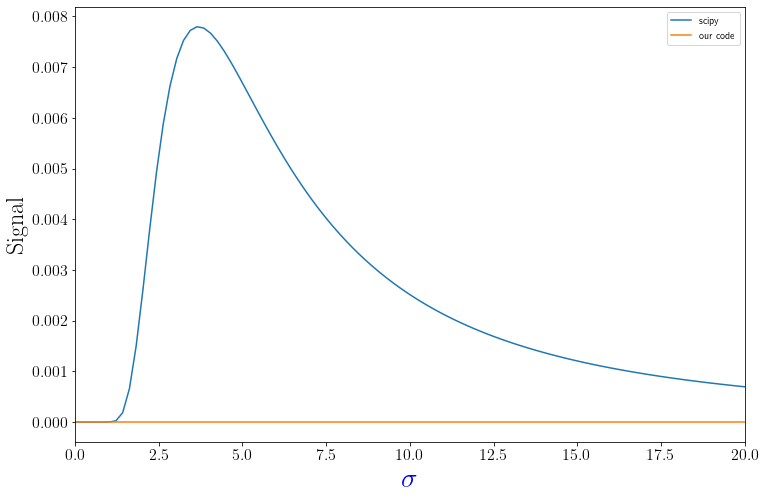

3.644545454545454


In [26]:
axis_size = 1000  # cells
detector_size = 10  #  diameter in mm
gap = 

detect = qd.create_detector(axis_size, detector_size, gap)



sigma, sigmaSignal = SigmaSignalSlice(0.01,20,100, gap , detector_size/2)
sum_s = np.array([])
for sig in sigma:
    beam = qd.laser(detector_size, axis_size, 0, 0, sig)
    sum_s = np.append(sum_s, np.sum(beam * detect))
print(sum_s.shape)
plt.plot(sigma, sigmaSignal, label='scipy')
plt.plot(sigma, sum_s, label='our code')
plt.xlabel(r"$\sigma$", fontsize=28, color='blue')
plt.ylabel(r"$\mathrm{Signal}$", fontsize=24)
#plt.ylim(0.0,1.1)
plt.xlim(0,20)
plt.legend()
plt.show()
imax = np.argmax(sigmaSignal)
print(sigma[imax])


In [4]:
qd.total_signal(5, 4, 5)

0.04161170997446785